# Projet 07 : Effectuer une prédiction de revenus

---
**Importation des librairies**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.colors as plc
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
import modules_perso.sf_graphiques as sfg

---
## <font color=blue>Mission 4 : Modélisation du revenu des individus </font>

### 4.7. ANOVA du logarithme du revenu basée sur le logarithme du revenu moyen et l'indice de Gini du pays, et sur la classe de revenu des parents

In [4]:
data = pd.read_csv("data_analyse06.csv", index_col=0)
data.head()

C:\Anaconda3\envs\Jupyter\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,ln_child_income,ln_revenu_moyen,gini_from_centiles,parent_centile
0,6.591534,8.004643,32.141019,1
1,6.591534,8.004643,32.141019,1
2,6.591534,8.004643,32.141019,1
3,6.591534,8.004643,32.141019,1
4,6.591534,8.004643,32.141019,1


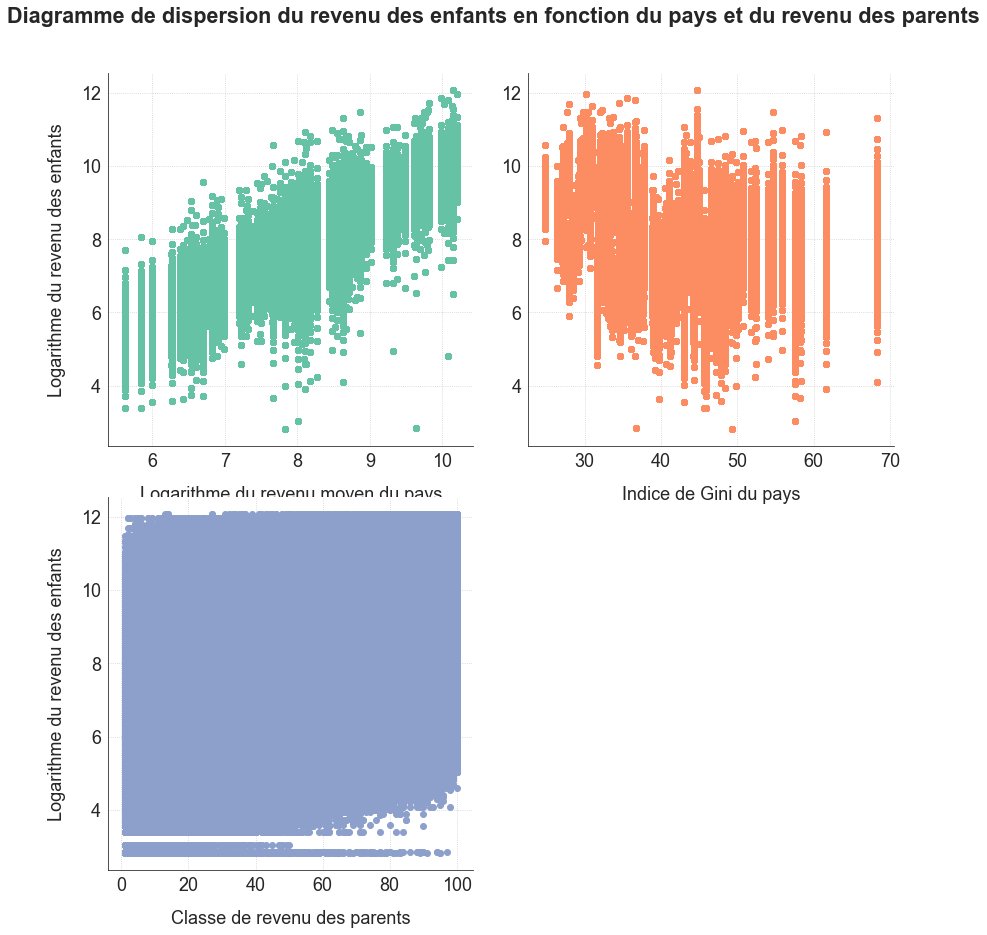

In [5]:
mygraph = sfg.MyGraph("Diagramme de dispersion du revenu des enfants en fonction du pays et du revenu des parents", nblin=2, nbcol=2, is_mono=False, figsize=(12,12))
mygraph.add_plot(data.ln_revenu_moyen, data.ln_child_income, label="", marker='o', color=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(data.gini_from_centiles, data.ln_child_income, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[1], markerfacecolor=mygraph.liste_couleurs[1], linestyle='', with_grid='both', grid_style=":", multi_index=2)
mygraph.add_plot(data.parent_centile, data.ln_child_income, label="", marker='o', color=mygraph.liste_couleurs[2], linestyle='', with_grid='both', grid_style=":", multi_index=3)
mygraph.set_axe('x', label="Logarithme du revenu moyen du pays", multi_index=1)
mygraph.set_axe('x', label="Indice de Gini du pays", multi_index=2)
mygraph.set_axe('x', label="Classe de revenu des parents", multi_index=3)
mygraph.set_axe('y', label="Logarithme du revenu des enfants", multi_index=1)
mygraph.set_axe('y', label="Logarithme du revenu des enfants", multi_index=3)
mygraph.ax[3].set_visible(False)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova06b_00_diagramme_dispersion.png")
plt.show()

Ces graphiques confirment encore une fois la pertinence de considérer le logarithme des revenus. La relation linéaire croissante entre le logarithme du revenu des enfants et le logarithme du revenu moyen du pays se dessine nettement. Le nuage de point du logarithme du revenu des enfants en fonction de l'indice de Gini ne montre pas de relation évidente mais est bien moins dispersé qu'avant. Le nuage de points du logarithme du revenu des enfants en fonction de la classe des parents ne laisse pas non plus apparaître de relation évidente. Regardons les résultats de la régression linéaire.

In [6]:
anova = smf.ols(formula="ln_child_income ~ ln_revenu_moyen + gini_from_centiles + C(parent_centile)", data=data).fit()

In [7]:
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ln_child_income   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                 2.054e+05
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:50:36   Log-Likelihood:            -5.4888e+06
No. Observations:             5642420   AIC:                         1.098e+07
Df Residuals:                 5642318   BIC:                         1.098e+07
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.3948      0.004   -104.805      0.000      -0.402      -0.387
C(parent_centile)[T.2]       0.1627      0.004     42.596      0.000       0.155       0.170
C(parent_centile)[T.3]       0.2418      0.004     63.319      0.000       0.234       0.249
C(parent_centile)[T.4]       0.2917      0.004     76.418      0.000       0.284       0.299
C(parent_centile)[T.5]       0.3300      0.004     86.451      0.000       0.323       0.338
C(parent_centile)[T.6]       0.3612      0.004     94.621      0.000       0.354       0.369
C(parent_centile)[T.7]       0.3919      0.004    102.703      0.000       0.384       0.399
C(parent_centile)[T.8]       0.4126      0.004    108.102      0.000       0.405       0.420
C(parent_centile)[T.9]       0.4384      0.004    114.886      0.000       0.431       0.446
C(parent_centile)[T.10]      0.4569      0.004    119.692      0.000       0.449       0.464
C(parent_centile)[T.11]      0.4810      0.004    126.057      0.000       0.474       0.488
C(parent_centile)[T.12]      0.4949      0.004    129.668      0.000       0.487       0.502
C(parent_centile)[T.13]      0.5138      0.004    134.620      0.000       0.506       0.521
C(parent_centile)[T.14]      0.5268      0.004    138.031      0.000       0.519       0.534
C(parent_centile)[T.15]      0.5454      0.004    142.889      0.000       0.538       0.553
C(parent_centile)[T.16]      0.5558      0.004    145.667      0.000       0.548       0.563
C(parent_centile)[T.17]      0.5687      0.004    149.012      0.000       0.561       0.576
C(parent_centile)[T.18]      0.5839      0.004    153.047      0.000       0.576       0.591
C(parent_centile)[T.19]      0.5949      0.004    155.898      0.000       0.587       0.602
C(parent_centile)[T.20]      0.6086      0.004    159.538      0.000       0.601       0.616
C(parent_centile)[T.21]      0.6197      0.004    162.415      0.000       0.612       0.627
C(parent_centile)[T.22]      0.6274      0.004    164.404      0.000       0.620       0.635
C(parent_centile)[T.23]      0.6401      0.004    167.773      0.000       0.633       0.648
C(parent_centile)[T.24]      0.6507      0.004    170.554      0.000       0.643       0.658
C(parent_centile)[T.25]      0.6588      0.004    172.608      0.000       0.651       0.666
C(parent_centile)[T.26]      0.6744      0.004    176.760      0.000       0.667       0.682
C(parent_centile)[T.27]      0.6815      0.004    178.628      0.000       0.674       0.689
C(parent_centile)[T.28]      0.6921      0.004    181.412      0.000       0.685       0.700
C(parent_centile)[T.29]      0.7065      0.004    185.183      0.000       0.699       0.714
C(parent_centile)[T.30]      0.7151      0.004    187.413      0.000       0.708       0.723
C(parent_centi

In [8]:
table_anova = sm.stats.anova_lm(anova, typ=2)
table_anova.loc["total","sum_sq"] = table_anova.loc[:,"sum_sq"].sum()
table_anova.loc["total","df"] = table_anova.loc[:,"df"].sum()
table_anova["eta_squared"] = table_anova[:-2]["sum_sq"] / table_anova.loc["total","sum_sq"]
cmr = table_anova["sum_sq"][-1] / table_anova["df"][-1]
table_anova["omega_squared"] = (table_anova[:-2]["sum_sq"] - (table_anova[:-2]["df"] * cmr)) / (table_anova.loc["total","sum_sq"] + cmr)
table_anova

,sum_sq,df,F,PR(>F),eta_squared,omega_squared
C(parent_centile),6.228708e+05,99.0,1.535642e+04,0.0,0.064141,0.064124
ln_revenu_moyen,6.662860e+06,1.0,1.626252e+07,0.0,0.686120,0.686120
gini_from_centiles,1.134934e+05,1.0,2.770114e+05,0.0,0.011687,0.011687
Residual,2.311694e+06,5642318.0,NaN,NaN,NaN,NaN
total,9.710918e+06,5642419.0,NaN,NaN,NaN,NaN


La part de variance expliquée par le modèle (R²) est la plus haute obtenue jusqu'à maintenant : 78,6% de la dispersion totale. Ce modèle présente également la meilleure qualité prédictive, avec les scores AIC et BIC les plus faibles de tous les modèles testés jusqu'à maintenant : 1,098e+7.  
L'ANOVA conclut à la significativité des trois variables. L'indice de Gini redevient significatif lorsque l'on considère le logarithme du revenu. Par contre, sa contribution au modèle reste très faible (omega squared = 0.012). Le logarithme du revenu moyen reste le principal contributeur du modèle (omega squared = 0.686).

### Vérification des hypothèses

**Hypothèse 1 : Normalité des résidus**

In [9]:
alpha_normalite = 0.05
ad_stat, ad_pvalue = sm.stats.normal_ad(anova.resid)
norm_stat, norm_pvalue = st.kstest(anova.resid, cdf='norm', args=(anova.resid.mean(), anova.resid.var(ddof=1)))
jb_stat, jb_pvalue, skw, kurt = sm.stats.stattools.jarque_bera(anova.resid)
df_normalite = pd.DataFrame({'H0':np.repeat("Distribution normale",3), 'Statistique':["{:.2f}".format(ad_stat),"{:.2f}".format(norm_stat),"{:.2f}".format(jb_stat)], \
                             'p-value':["{:.3f}".format(ad_pvalue),"{:.3f}".format(norm_pvalue),"{:.3f}".format(jb_pvalue)]}, index=["Anderson-Darling","Kolmogorov-Smirnov","Jarque-Bera"])
inter_col = "Résultat (seuil={:.1%})".format(alpha_normalite)
df_normalite[inter_col] = ["Normalité acceptée" if float(pval)>=alpha_normalite else "Normalité rejetée" for pval in df_normalite["p-value"]]
df_normalite

C:\Anaconda3\envs\Jupyter\lib\site-packages\statsmodels\stats\_adnorm.py:66: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)


,H0,Statistique,p-value,Résultat (seuil=5.0%)
Anderson-Darling,Distribution normale,12120.44,0.000,Normalité rejetée
Kolmogorov-Smirnov,Distribution normale,0.08,0.000,Normalité rejetée
Jarque-Bera,Distribution normale,1704188.69,0.000,Normalité rejetée


Aucun des trois test n'accepte la normalité. Nous avons un grand nombre d'observations. Une symétrie de la distribution des résidus sera suffisante. Je vérifie graphiquement cette symétrie, et je trace également la droite de Henry.

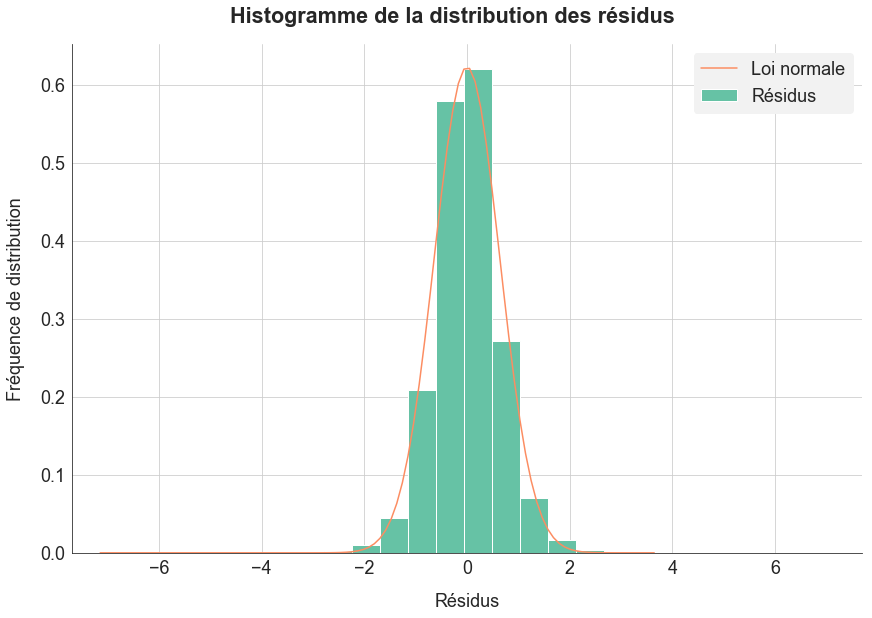

In [10]:
x_theo = np.arange(anova.resid.min(), anova.resid.max(), 0.01*(anova.resid.max()-anova.resid.min()))
mygraph = sfg.MyGraph("Histogramme de la distribution des résidus", is_mono=False)
mygraph.add_histogramme(anova.resid, bins=20, labels="Résidus")
mygraph.add_plot(x_theo, st.norm.pdf(x_theo, scale=anova.resid.std(ddof=1)), label="Loi normale", legend=True)
xmin, xmax = mygraph.ax[0].get_xlim()
absmax = max(-xmin, xmax)
mygraph.set_axe('y', label="Fréquence de distribution")
mygraph.set_axe('x', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova06b_01_distribution_residus.png")
plt.show()

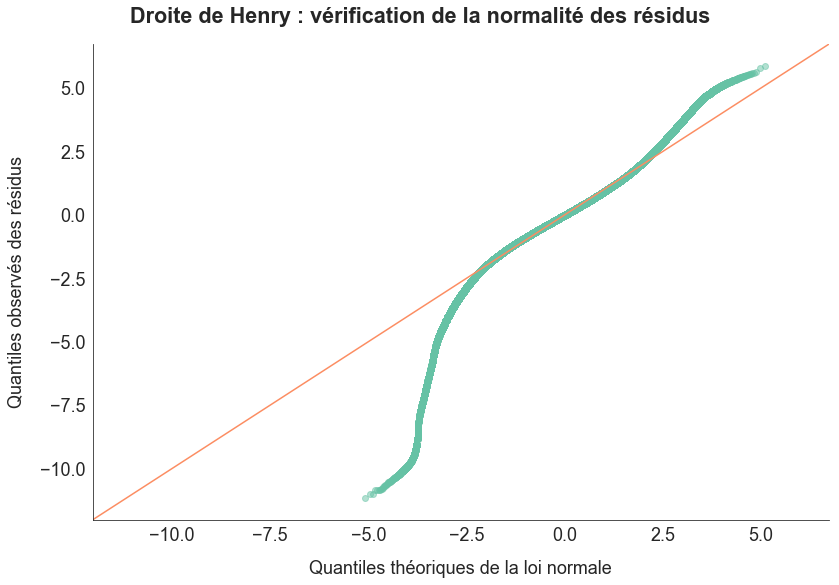

In [11]:
mygraph = sfg.MyGraph("Droite de Henry : vérification de la normalité des résidus", is_mono=False)
sm.qqplot(anova.resid, fit=True, markeredgecolor=mygraph.liste_couleurs[0], markerfacecolor=mygraph.liste_couleurs[0], alpha=0.5, ax=mygraph.ax[0])
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="", color=mygraph.liste_couleurs[1])
mygraph.set_axe('x', label="Quantiles théoriques de la loi normale")
mygraph.set_axe('y', label="Quantiles observés des résidus")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova06b_02_droite_henry.png")
plt.show()

On remarque que les résidus ne sont pas normaux. Par contre, ils présentent une symétrie assez bonne, même si elle est moins parfaite que pour le modèle 4. Le graphique de la distribution des résidus reste satisfaisant vu le grand nombre de données de notre échantillon.
La droite de Henry montre encore une fois la difficulté de modélisation des valeurs extrêmes. Elle est intéressante car elle montre que les valeurs extrêmes ne subissent plus les mêmes effets de seuil que dans le modèle 4. L'ajout de la classe de revenu des parents semble lisser les valeurs extrêmes.

**Hypothèse 2 : Linéarité et additivité de la relation  
Hypothèse 3 : Homoscédasticité des résidus**

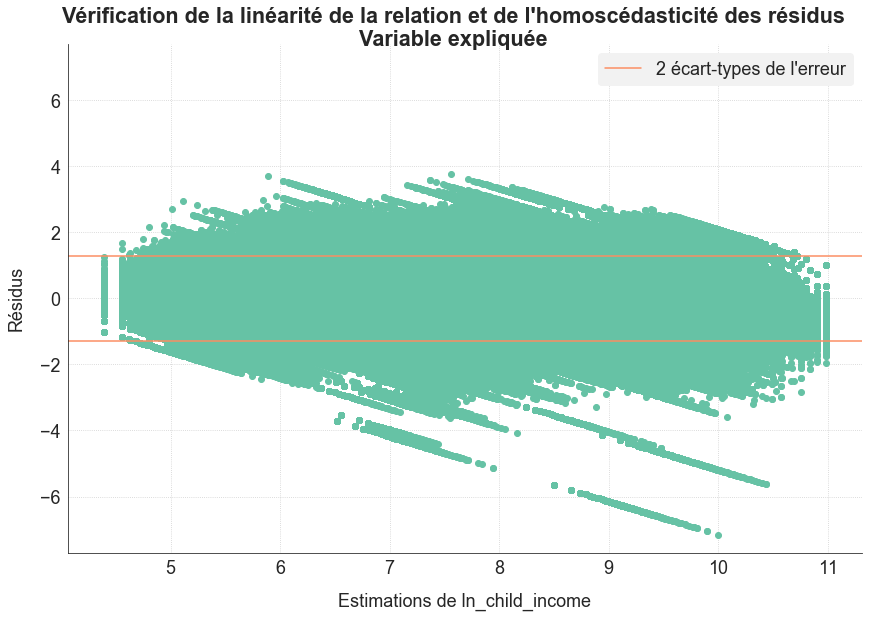

In [12]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation et de l'homoscédasticité des résidus\nVariable expliquée", is_mono=False)
mygraph.add_plot(anova.fittedvalues, anova.resid, label="", marker='o', linestyle='', with_grid='both', grid_style=":")
yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1])
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Estimations de ln_child_income")
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova06b_03_linearite_homoscedasticite_endo.png")
plt.show()

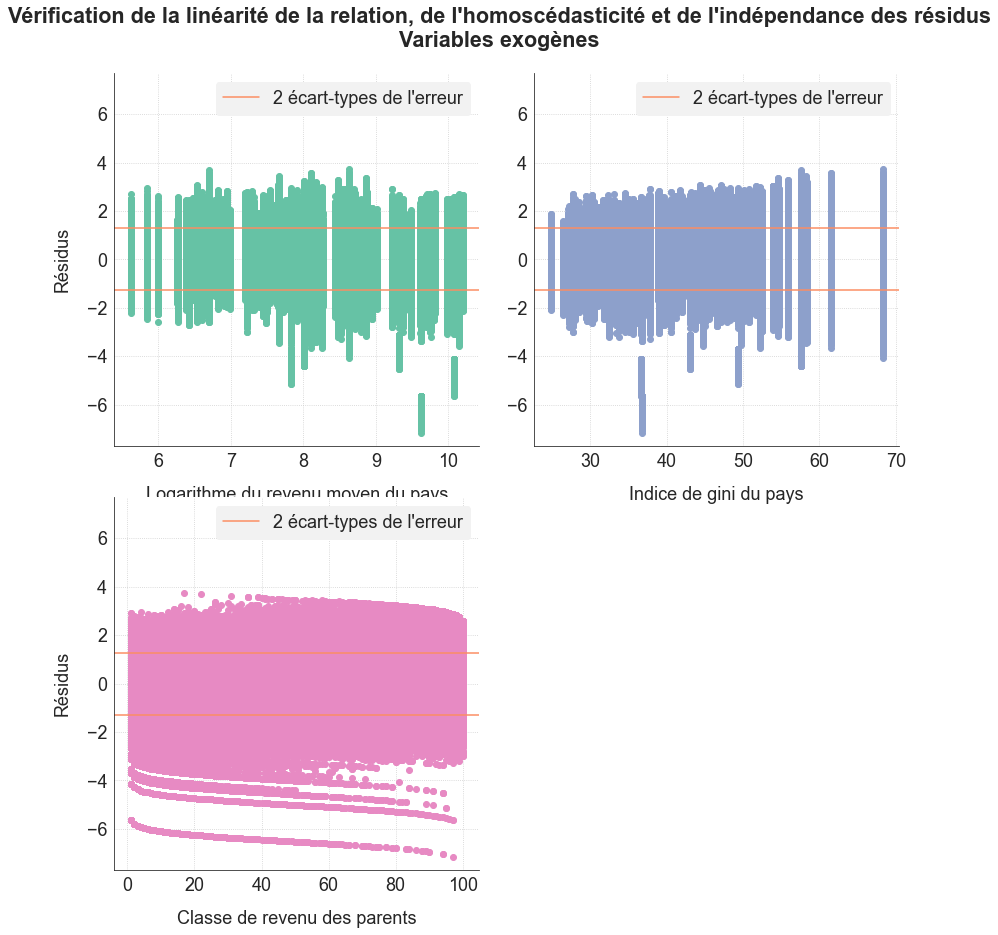

In [13]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation, de l'homoscédasticité et de l'indépendance des résidus\nVariables exogènes", nblin=2, nbcol=2, is_mono=False, figsize=(12,12))
mygraph.add_plot(data.ln_revenu_moyen, anova.resid, label="", marker='o', color=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(data.gini_from_centiles, anova.resid, label="", marker='o', color=mygraph.liste_couleurs[2], linestyle='', with_grid='both', grid_style=":", multi_index=2)
mygraph.add_plot(data.parent_centile, anova.resid, label="", marker='o', color=mygraph.liste_couleurs[3], linestyle='', with_grid='both', grid_style=":", multi_index=3)
#yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=1)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=1)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=2)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=2)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=3)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=3)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Logarithme du revenu moyen du pays", multi_index=1)
mygraph.set_axe('x', label="Indice de gini du pays", multi_index=2)
mygraph.set_axe('x', label="Classe de revenu des parents", multi_index=3)
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax, multi_index=1)
mygraph.set_axe('y', tick_min=-absmax, tick_max=absmax, multi_index=2)
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax, multi_index=3)
mygraph.ax[3].set_visible(False)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova06b_04_linearite_homoscedasticite_exo.png")
plt.show()

In [14]:
alpha_homo = 0.05
lm_stat, lm_pvalue, f_stat, f_pvalue = sm.stats.diagnostic.het_breuschpagan(anova.resid, anova.model.exog)
if f_pvalue >= alpha_homo:
    test_result = ["Homoscédasticité acceptée"]
else:
    test_result = ["Homoscédasticité rejetée"]
pd.DataFrame({'H0':["Variance des résidus constante"], 'Statistique':["{:.2f}".format(f_stat)], \
             'p-value':["{:.3f}".format(f_pvalue)], 'Résultat (seuil={:.1%})'.format(alpha_homo):test_result}, index=["Breusch Pagan"])

,H0,Statistique,p-value,Résultat (seuil=5.0%)
Breusch Pagan,Variance des résidus constante,2673.36,0.000,Homoscédasticité rejetée


L'homoscédasticité est rejetée par le test. Par contre, les graphiques montrent que les résidus sont désormais assez bien répartis dans les valeurs positives et négatives. Les graphiques sont satisfaisants et permettent de valider les hypothèses d'homoscédasticité des résidus et de linéarité de la relation.  
Il est intéressant de noter que l'éventuelle hétéroscédasticité des résidus par rapport à l'indice de Gini est moins évidente que sur le même graphique du modèle 4.

**Conclusion sur les hypothèses**

Les graphiques permettent d'accepter les 3 hypothèses et de pousser plus avant l'analyse du modèle.

**Vérification supplémentaire : absence de colinéarité entre les exogènes**

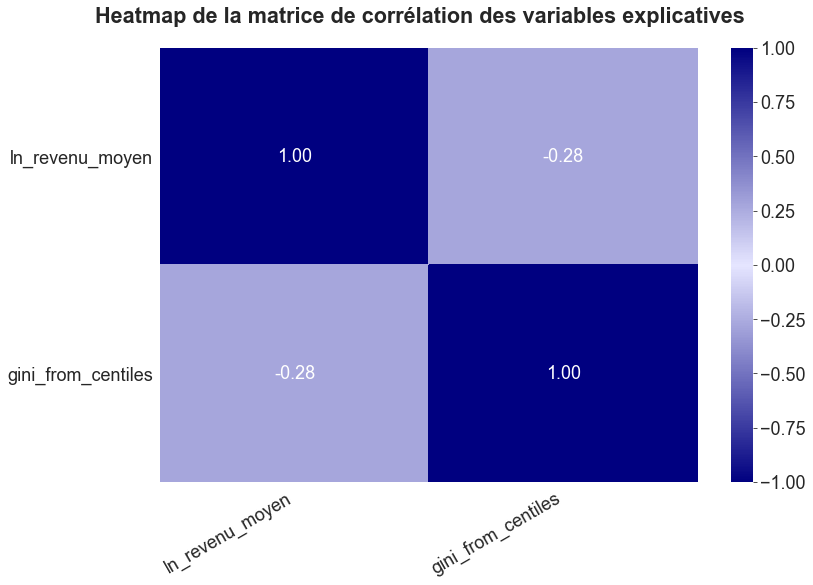

In [15]:
matrice_correl = np.corrcoef(data[["ln_revenu_moyen","gini_from_centiles"]], rowvar=False)
mygraph = sfg.MyGraph("Heatmap de la matrice de corrélation des variables explicatives", is_mono=True)
sns.heatmap(matrice_correl, vmin=-1, vmax=1, fmt='.2f', cmap=plc.LinearSegmentedColormap.from_list("", [mygraph.liste_couleurs[-1],mygraph.liste_couleurs[0],mygraph.liste_couleurs[-1]]), \
            cbar_kws={'ticks':[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]}, annot=True, ax=mygraph.ax[0])
mygraph.set_axe('y', tick_labels=["ln_revenu_moyen","gini_from_centiles"], rotation=0)
mygraph.set_axe('x', tick_labels=["ln_revenu_moyen","gini_from_centiles"], rotation=30, ha='right')
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova06b_05_matrice_correl.png")
plt.show()

Le calcul des indices VIF pour l'ensemble des variables exogènes donne un VIF maximum de 1,99. Il n'y a donc pas de problème de colinéarité.  
Le détail des calculs (sur un sous-échantillon) est disponible sur un notebook dédié à ce calcul : [data_analyst_projet07_M46_modelisation06_calculVIF](data_analyst_projet07_M46_modelisation06_calculVIF.ipynb#calcul_vif).

Les variables sont peu liées entre elles. Les indices VIF ne dépassent pas 1,99. Il n'y a pas de problème de colinéarité simple ou multiple.

**Vérification de la pertinence des estimations par rapport aux valeurs réelles**

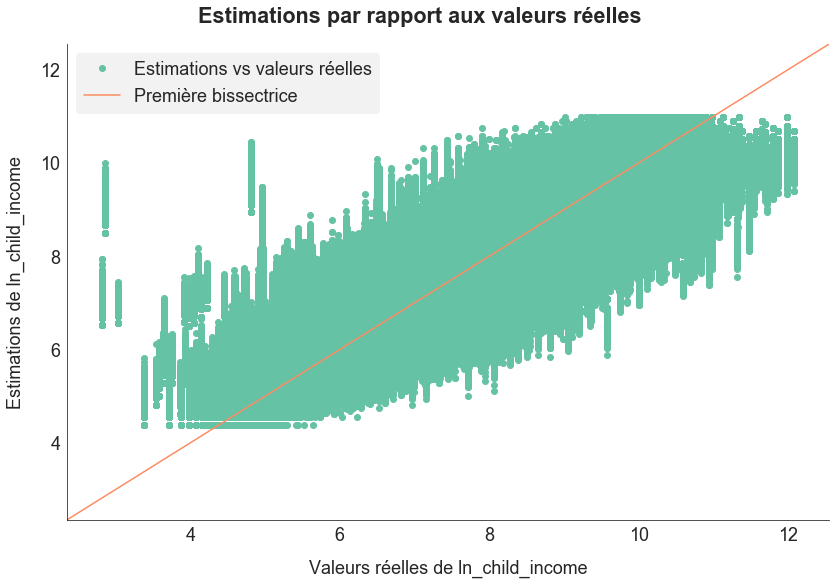

In [16]:
mygraph = sfg.MyGraph("Estimations par rapport aux valeurs réelles", is_mono=False)
mygraph.add_plot(data.ln_child_income, anova.fittedvalues, label="Estimations vs valeurs réelles", marker='o', linestyle="")
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="Première bissectrice", legend=True)
mygraph.set_axe('y', label="Estimations de ln_child_income")
mygraph.set_axe('x', label="Valeurs réelles de ln_child_income")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova06b_06_accuracy_graph.png")
plt.show()

Les estimations semblent légèrement moins dispersées par rapport à la première bissectrice avec ce modèle.

**Analyse des outliers**

In [17]:
n, p = anova.model.exog.shape
p = p - 1  # j'enlève la constante du nombre de paramètres pour ajuster les seuils
seuils = pd.Series(index=["levier", "resid_student", "dffits", "cook","dfbetas"])
seuils.levier = 2 * (p + 1) / n
seuils.dffits = 2 * np.sqrt((p + 1) / n)
seuils.cook = 4 / (n - p - 1)
seuils.resid_student = st.t.ppf(1-(0.05/2), n-p-2)  # seuil de 5% pour les résidus studentisés
reg_influence = anova.get_influence()
analyses = pd.DataFrame({"observation_name":data.index})
analyses["levier"] = reg_influence.hat_matrix_diag
#analyses["external_resid_student"] = reg_influence.resid_studentized_external
#analyses["outlier"] = ((analyses.levier > seuils.levier) | (abs(analyses.external_resid_student) > seuils.resid_student))
analyses["outlier"] = analyses.levier > seuils.levier
#analyses["dffits"] = reg_influence.dffits[0]
analyses["cook_distance"] = reg_influence.cooks_distance[0]
analyses["influence"] = analyses.cook_distance > seuils.cook
#analyses["influence"] = (abs(analyses.dffits) > seuils.dffits) | (analyses.cook_distance > seuils.cook)

In [18]:
seuils[["levier","cook"]].to_frame().style.format("{:.8f}")

,0
levier,0.00003615
cook,0.00000071


In [19]:
only_both = False
if only_both == False:
    print("Résumé des observations atypiques OU influentes")
    variables_speciales = analyses[(analyses.outlier | analyses.influence) & (analyses.outlier != analyses.influence)]
    print(variables_speciales)
    print("")
print("Résumé des observations atypiques ET influentes")
variables_investigation = analyses[analyses.outlier & analyses.influence]
variables_investigation

Résumé des observations atypiques OU influentes
         observation_name    levier  outlier  cook_distance  influence
493                   493  0.000018    False   7.151106e-07       True
494                   494  0.000018    False   8.736123e-07       True
988                   988  0.000018    False   7.116874e-07       True
989                   989  0.000018    False   7.346772e-07       True
48355               48355  0.000018    False   8.623474e-07       True
48356               48356  0.000018    False   8.006789e-07       True
48357               48357  0.000018    False   7.299087e-07       True
48358               48358  0.000018    False   7.299087e-07       True
48854               48854  0.000018    False   9.084001e-07       True
48855               48855  0.000018    False   9.084001e-07       True
48856               48856  0.000018    False   8.886715e-07       True
48857               48857  0.000018    False   8.644268e-07       True
48858               48858  0.

,observation_name,levier,outlier,cook_distance,influence


Le nombre d'obervations soit atypiques soit influentes (mais pas à la fois atypiques et influentes) diminue par rapport au modèle 4 (276 565 observations, soit 4,90% de l'échantillon). Toutes ces observations sont influentes.  
Il n'y a plus d'obervations à la fois atypiques et influentes. Ce qui revient à dire qu'il n'y a plus d'observation atypique.  
Le fait d'ajouter la classe de revenu des parents permet donc de réduire le nombre d'observations influentes et, surtout, de ne plus avoir d'observations à la fois atypiques et influentes.

**Conclusion sur ce modèle**

L'ajout de la classe de revenu des parents est très bénéfique :  
- les 3 trois variables (logarithme du revenu moyen, indice de Gini et classe de revenu des parents) sont significatives ;  
- la part de dispersion expliquée par le modèle augmente ;  
- il n'y a plus de variable atypique, et par conséquent plus d'obervation à la fois atypique et influente.  

Toutefois, ce modèle possède un inconvénient : il est composé de 101 coefficients (en plus de la constante). En effet, nous avons un coefficient pour 99 classes de revenu plus les 2 coefficients pour le logarithme du revenu moyen et pour l'indice de Gini.  
Je tente donc de simplifier le modèle en remplaçant la classe de revenu des parents par le logarithme du revenu des parents (on considère que le revenu des parents correspond au revenu moyen de leur classe de revenu). Ainsi, j'aurai un modèle avec seulement 3 coefficients (en plus de la constante) : le logarithme du revenu moyen du pays, l'indice de Gini et le logarithme du revenu des parents.